<a href="https://colab.research.google.com/github/Sukantanath108/Pytorch_practise_DL/blob/main/CS231_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

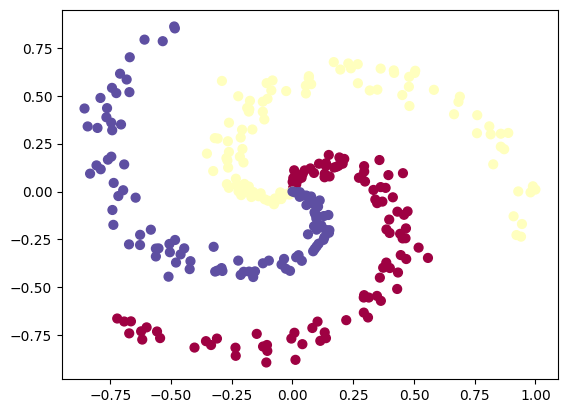

In [ ]:
%matplotlib inline
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda')

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:

class mod(nn.Module):
  def __init__(self,input,output,hidden_unit=10):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input,out_features=hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features=hidden_unit,out_features=hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features=hidden_unit,out_features=output)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
model = mod(input=2,output=3,hidden_unit=10).to(device)

In [ ]:
loss_func = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(params = model.parameters(),lr = 0.01)

In [ ]:
X_train.device

'cpu'

In [ ]:
X_train , y_train = torch.from_numpy(X_train).type(torch.float).to(device), torch.from_numpy(y_train).type(torch.float).to(device)
X_test , y_test = torch.from_numpy(X_test).type(torch.float).to(device), torch.from_numpy(y_test).type(torch.float).to(device)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000

for epoch in range(epochs):

  model.train()
  y_logits = model(X_train)
  y_pred = torch.argmax(y_logits,dim=1)

  loss = loss_func(y_logits,y_train.long())
  acc = (y_pred == y_train).sum().item() / len(y_train) * 100

  optimizer_1.zero_grad()
  loss.backward()
  optimizer_1.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test)
    test_pred = torch.argmax(test_logits,dim=1)
    test_loss = loss_func(test_logits,y_test.long())
    test_acc = (test_pred == y_test).sum().item() / len(y_test) * 100

  if epoch % 100 == 0:
      print(f"Epoch no : {epoch}/{epochs} | Training loss: {loss.item():.3f} | Accuracy: {acc:.2f}% | Test loss: {test_loss:.3f} | Test_Accuracy: {test_acc:.2f}%")


Epoch no : 0/1000 | Training loss: 1.131 | Accuracy: 32.50% | Test loss: 1.094 | Test_Accuracy: 36.67%
Epoch no : 100/1000 | Training loss: 1.090 | Accuracy: 32.50% | Test loss: 1.075 | Test_Accuracy: 36.67%
Epoch no : 200/1000 | Training loss: 1.072 | Accuracy: 47.92% | Test loss: 1.068 | Test_Accuracy: 46.67%
Epoch no : 300/1000 | Training loss: 1.059 | Accuracy: 51.67% | Test loss: 1.062 | Test_Accuracy: 53.33%
Epoch no : 400/1000 | Training loss: 1.047 | Accuracy: 55.83% | Test loss: 1.054 | Test_Accuracy: 48.33%
Epoch no : 500/1000 | Training loss: 1.034 | Accuracy: 55.83% | Test loss: 1.044 | Test_Accuracy: 60.00%
Epoch no : 600/1000 | Training loss: 1.020 | Accuracy: 56.67% | Test loss: 1.033 | Test_Accuracy: 63.33%
Epoch no : 700/1000 | Training loss: 1.005 | Accuracy: 55.42% | Test loss: 1.019 | Test_Accuracy: 55.00%
Epoch no : 800/1000 | Training loss: 0.989 | Accuracy: 55.83% | Test loss: 1.005 | Test_Accuracy: 50.00%
Epoch no : 900/1000 | Training loss: 0.973 | Accuracy: 52

USing SGD we are getting highest 43% accuracy. Lets switch to Adam

In [ ]:
Optimizer_2 = torch.optim.Adam(params = model.parameters(),lr = 0.01)

In [ ]:

epochs = 1000

for epoch in range(epochs):

  model.train()
  y_logits = model(X_train)
  y_pred = torch.argmax(y_logits,dim=1)

  loss = loss_func(y_logits,y_train.long())
  acc = (y_pred == y_train).sum().item() / len(y_train) * 100

  Optimizer_2.zero_grad()
  loss.backward()
  optimizer_1.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test)
    test_pred = torch.argmax(test_logits,dim=1)
    test_loss = loss_func(test_logits,y_test.long())
    test_acc = (test_pred == y_test).sum().item() / len(y_test) * 100

  if epoch % 100 == 0:
      print(f"Epoch no : {epoch}/{epochs} | Training loss: {loss.item():.3f} | Accuracy: {acc:.2f}% | Test loss: {test_loss:.3f} | Test_Accuracy: {test_acc:.2f}%")


Epoch no : 0/1000 | Training loss: 0.958 | Accuracy: 49.58% | Test loss: 0.975 | Test_Accuracy: 43.33%
Epoch no : 100/1000 | Training loss: 0.943 | Accuracy: 45.83% | Test loss: 0.961 | Test_Accuracy: 41.67%
Epoch no : 200/1000 | Training loss: 0.930 | Accuracy: 46.25% | Test loss: 0.948 | Test_Accuracy: 41.67%
Epoch no : 300/1000 | Training loss: 0.918 | Accuracy: 46.25% | Test loss: 0.936 | Test_Accuracy: 41.67%
Epoch no : 400/1000 | Training loss: 0.907 | Accuracy: 47.50% | Test loss: 0.926 | Test_Accuracy: 43.33%
Epoch no : 500/1000 | Training loss: 0.898 | Accuracy: 48.75% | Test loss: 0.917 | Test_Accuracy: 43.33%
Epoch no : 600/1000 | Training loss: 0.889 | Accuracy: 48.75% | Test loss: 0.909 | Test_Accuracy: 43.33%
Epoch no : 700/1000 | Training loss: 0.881 | Accuracy: 49.17% | Test loss: 0.901 | Test_Accuracy: 46.67%
Epoch no : 800/1000 | Training loss: 0.873 | Accuracy: 48.75% | Test loss: 0.895 | Test_Accuracy: 46.67%
Epoch no : 900/1000 | Training loss: 0.865 | Accuracy: 49

In [ ]:
import requests
from pathlib import Path

In [ ]:
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists


Text(0.5, 1.0, 'Model with ReLU (Test Set)')

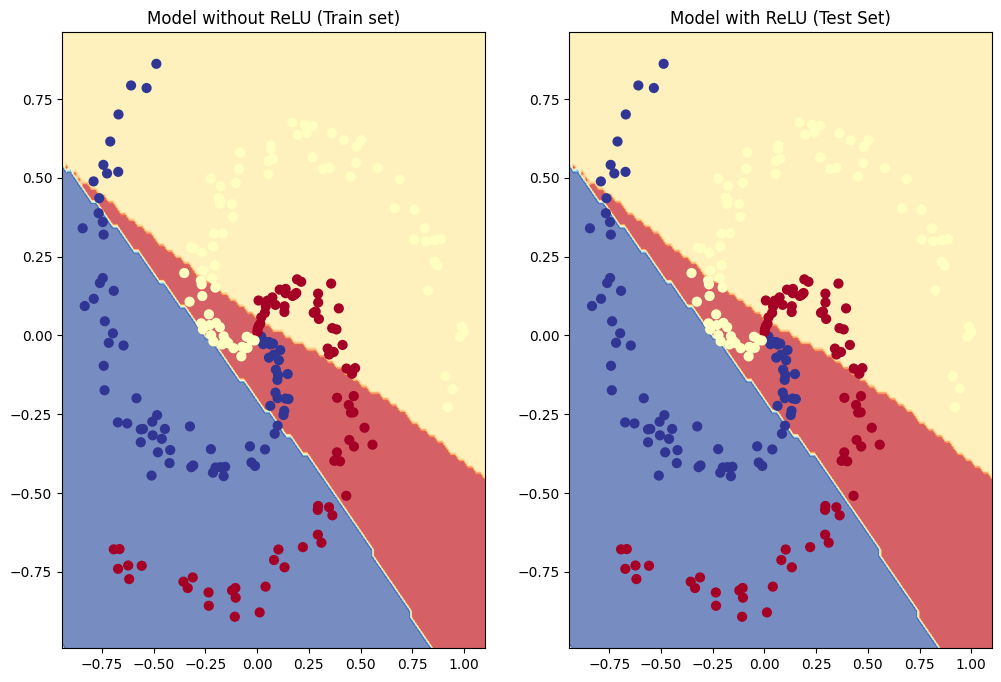

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plot_decision_boundary(model,X_train,y_train)
plt.title("Model without ReLU (Train set)")
plt.subplot(1,2,2)
plot_decision_boundary(model,X_train,y_train)
plt.title("Model with ReLU (Test Set)")

In [ ]:
class mod(nn.Module):
  def __init__(self,input,output,hidden_unit=50):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input,out_features=hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features=hidden_unit,out_features=hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features=hidden_unit,out_features=hidden_unit),
        nn.ReLU(),
        nn.Linear(in_features=hidden_unit,out_features=output)
    )

  def forward(self,x):
    return self.layer_stack(x)

model_new = mod(input=2,output=3,hidden_unit=50).to(device)

In [ ]:
model_new.layer_stack[0].weight.device

device(type='cuda', index=0)

In [ ]:
opta = torch.optim.Adam(params = model_new.parameters(),lr = 0.01)

In [ ]:
epochs = 1000

for epoch in range(epochs):

  model_new.train()
  y_logits = model_new(X_train)
  y_pred = torch.argmax(y_logits,dim=1)

  loss = loss_func(y_logits,y_train.long())
  acc = (y_pred == y_train).sum().item() / len(y_train) * 100

  opta.zero_grad()
  loss.backward()
  opta.step()

  model_new.eval()
  with torch.inference_mode():
    test_logits = model_new(X_test)
    test_pred = torch.argmax(test_logits,dim=1)
    test_loss = loss_func(test_logits,y_test.long())
    test_acc = (test_pred == y_test).sum().item() / len(y_test) * 100

  if epoch % 100 == 0:
      print(f"Epoch no : {epoch}/{epochs} | Training loss: {loss.item():.3f} | Accuracy: {acc:.2f}% | Test loss: {test_loss:.3f} | Test_Accuracy: {test_acc:.2f}%")

Epoch no : 0/1000 | Training loss: 1.102 | Accuracy: 32.50% | Test loss: 1.083 | Test_Accuracy: 51.67%
Epoch no : 100/1000 | Training loss: 0.023 | Accuracy: 99.17% | Test loss: 0.002 | Test_Accuracy: 100.00%
Epoch no : 200/1000 | Training loss: 0.017 | Accuracy: 99.17% | Test loss: 0.000 | Test_Accuracy: 100.00%
Epoch no : 300/1000 | Training loss: 0.015 | Accuracy: 99.17% | Test loss: 0.000 | Test_Accuracy: 100.00%
Epoch no : 400/1000 | Training loss: 0.014 | Accuracy: 99.17% | Test loss: 0.000 | Test_Accuracy: 100.00%
Epoch no : 500/1000 | Training loss: 0.014 | Accuracy: 99.17% | Test loss: 0.000 | Test_Accuracy: 100.00%
Epoch no : 600/1000 | Training loss: 0.014 | Accuracy: 99.17% | Test loss: 0.000 | Test_Accuracy: 100.00%
Epoch no : 700/1000 | Training loss: 0.015 | Accuracy: 99.17% | Test loss: 0.000 | Test_Accuracy: 100.00%
Epoch no : 800/1000 | Training loss: 0.014 | Accuracy: 99.17% | Test loss: 0.000 | Test_Accuracy: 100.00%
Epoch no : 900/1000 | Training loss: 0.014 | Accu

Text(0.5, 1.0, 'Model with ReLU (Test Set)')

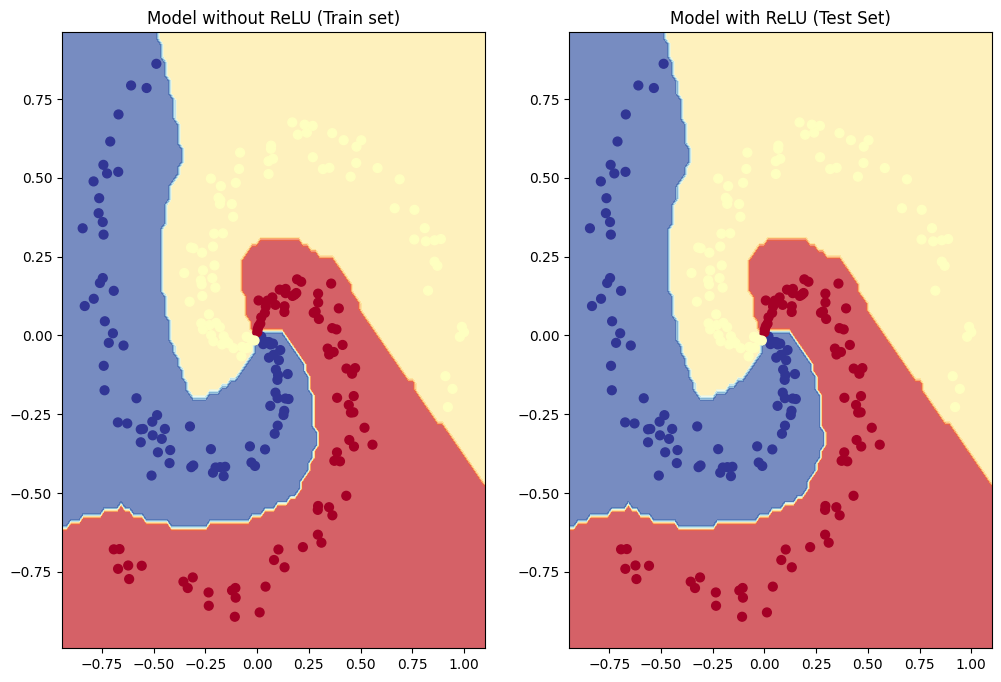

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plot_decision_boundary(model_new,X_train,y_train)
plt.title("Model without ReLU (Train set)")
plt.subplot(1,2,2)
plot_decision_boundary(model_new,X_train,y_train)
plt.title("Model with ReLU (Test Set)")